# Real-Time E-commerce Data Pipeline with Spark ETL

## Project Overview

In this project, you will design and implement an ETL (Extract, Transform, Load) pipeline for a hypothetical e-commerce platform named **ShopEase**. The platform generates massive amounts of data daily, including user interactions, transactions, and inventory updates. Your task is to process this data using Apache Spark to derive meaningful insights and support real-time analytics.


## Scenario

**ShopEase** aims to enhance its data analytics capabilities to improve user experience, optimize inventory management, and increase sales. The data generated includes:

- **User Activity Logs:** Clickstream data capturing user interactions on the website.
- **Transaction Records:** Details of purchases, refunds, and returns.
- **Inventory Updates:** Information about stock levels, restocks, and product information changes.
- **Customer Feedback:** Reviews and ratings provided by customers.

The company requires a robust ETL pipeline to process this data, perform transformations, and make it available for analytics and reporting in both batch and real-time modes.


## Project Requirements

You are required to perform the following tasks using Apache Spark (preferably with PySpark or Scala):

### 1. Data Ingestion
- **Batch Data:**
  - Load historical data from large CSV and JSON files stored in your local file system.
- **Real-Time Data:**
  - Simulate and ingest streaming data from a Kafka topic representing live user activity logs.

### 2. Data Processing and Transformation
- **Using RDDs:**
  - Perform a transformation to filter out any corrupted or incomplete records from the transaction data.
  - Implement a custom transformation to anonymize user IDs for privacy compliance.
- **Using DataFrames:**
  - Clean and standardize inventory data (e.g., handling missing values, normalizing text).
  - Join user activity logs with transaction records to analyze user behavior leading to purchases.
- **Using Spark SQL:**
  - Create temporary views and execute SQL queries to compute:
    - Top 10 most purchased products in the last month.
    - Monthly revenue trends.
    - Inventory turnover rates.

### 3. Real-Time Streaming Processing (Optional but Recommended)
- Set up a Spark Streaming job to process incoming user activity logs.
- Compute real-time metrics such as:
  - Active users per minute.
  - Real-time conversion rates.
  - Detect and alert on unusual spikes in specific user activities.

### 4. Data Storage
- Store the transformed data into appropriate storage systems:
  - Use Parquet format for batch-processed data in a local data lake.
  - Use an in-memory data store like Redis or a database like PostgreSQL for real-time metrics.

### 5. Performance Optimization
- Optimize Spark jobs for better performance by:
  - Caching intermediate DataFrames where necessary.
  - Tuning Spark configurations (e.g., partition sizes, executor memory).
  - Using appropriate join strategies.

### 6. Documentation and Reporting
- Document the ETL pipeline architecture.
- Provide sample dashboards or reports (using Spark's built-in visualization) showcasing the insights derived.


# **Pipeline architecture**

1. **Overview**


*   This ETL pipeline is designed to extract transaction data transform it for analysis, and vizualizing insights
*   Compute real-time metrics like active users per minute
*   Data is extracted from streaming CSV files, batch files, and JSON files

2.   **Diagram**

3. **Data Extraction**


*   The pipeline extracts data from streaming CSV files located in the streaming_transactions_folder, as well as batch data from CSV files
*   For CSV files, Spark reads the data in real-time using the readStream

4. **Data Transformation**

*   User IDs are anonymized using a hashing function
*   Missing values are dropped
*   Transactions from the year are filtered for analysis, and revenue is aggregated by month
*   PySpark's DataFrame API is used for transformation operations, including filtering, joins, and aggregations


5. **Data Loading**

*   The cleaned and transformed data is loaded into a Parquet file





## Questions & Requirements

### 1. Data Ingestion
- **Q1:** How did you ingest the batch and real-time data? Provide code snippets demonstrating the loading of data using RDDs and DataFrames.

### 2. Data Cleaning and Transformation
- **Q2:** Describe the transformations applied to the transaction data using RDDs. How did you ensure data quality and privacy?

### 3. DataFrame Operations
- **Q3:** How did you clean and standardize the inventory data using DataFrames? Provide examples of handling missing values and normalizing text fields.

### 4. Spark SQL Queries
- **Q4:** Present the Spark SQL queries used to calculate the top 10 most purchased products, monthly revenue trends, and inventory turnover rates.

### 5. Real-Time Processing
- **Q5:** If implemented, explain how the real-time streaming was set up. What metrics were computed in real-time, and how were they stored/displayed?

### 6. Performance Optimization
- **Q6:** What strategies did you employ to optimize the performance of your Spark jobs? Provide examples of configuration settings or code optimizations.

### 7. Reporting
- **Q7:** Show sample outputs or dashboards that visualize the insights derived from the ETL pipeline.


In [2]:
pip install pyspark


In [3]:
# Step 1: Data Ingestion - Load Large Datasets

from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("ETL Project") \
    .getOrCreate()

In [4]:
# Load large transactions data
transactions_df = spark.read.csv('large_transactions.csv', header=True, inferSchema=True)

# Load large inventory data
inventory_df = spark.read.option("multiLine", True).json("large_inventory.json")
feedback_df =  spark.read.csv("large_customer_feedback.csv", header=True, inferSchema=True)

# Display a sample of each dataset
transactions_df.show(5)
inventory_df.show(5)
feedback_df.show(5,truncate=True)

+--------------+-------+----------+--------+------+----------------+
|transaction_id|user_id|product_id|quantity|amount|transaction_date|
+--------------+-------+----------+--------+------+----------------+
|             1|   5388|      9152|       9|305.67|      2023-01-07|
|             2|  31656|      5763|       1|184.31|      2023-05-16|
|             3|  36725|      4733|       4|  7.66|      2023-01-20|
|             4|  22713|      4207|       1|411.73|      2023-04-19|
|             5|  74067|      1914|       5|499.21|      2023-08-17|
+--------------+-------+----------+--------+------+----------------+
only showing top 5 rows

+------+----------+------------+-----------+
| price|product_id|product_name|stock_level|
+------+----------+------------+-----------+
| 91.89|         1|   Product_1|         61|
|  9.75|         2|   Product_2|        553|
|182.89|         3|   Product_3|        328|
|148.38|         4|   Product_4|        347|
| 78.17|         5|   Product_5|       

In [ ]:
feedback_df.show(5,truncate=False)

+-------+----------+------+-------------------------------------------+-----------+
|user_id|product_id|rating|review                                     |review_date|
+-------+----------+------+-------------------------------------------+-----------+
|9320   |1971      |4     |Review text for product 1971 by user 9320. |2023-01-11 |
|64245  |3664      |4     |Review text for product 3664 by user 64245.|2023-01-23 |
|37341  |7419      |4     |Review text for product 7419 by user 37341.|2023-08-14 |
|43430  |6536      |2     |Review text for product 6536 by user 43430.|2023-12-29 |
|6848   |3038      |1     |Review text for product 3038 by user 6848. |2023-08-03 |
+-------+----------+------+-------------------------------------------+-----------+
only showing top 5 rows



In [5]:
# Step 2: Data Cleaning and Transformation with RDDs
# Convert transactions DataFrame to RDD
transactions_rdd = transactions_df.rdd

# Filter out corrupted records (e.g., missing transaction_id or amount)
cleaned_rdd = transactions_rdd.filter(lambda record: record['transaction_id'] is not None and record['amount'] is not None)




In [6]:
# Write Function to Anonymize user IDs using Hashing
import hashlib

def anonymize(record):

  user_id_hashed = hashlib.sha256(str(record['user_id']).encode('utf-8')).hexdigest()
    # Return a new record with the hashed user ID
  return {
        'transaction_id': record['transaction_id'],
        'user_id': user_id_hashed,
        'product_id': record['product_id'],
        'quantity': record['quantity'],
        'amount': record['amount'],
        'transaction_date': record['transaction_date']
    }

# Apply the anonymization function to each record in the RDD
anonymized_rdd = cleaned_rdd.map(anonymize)

# Convert back to DataFrame
cleaned_transactions_df = anonymized_rdd.toDF()

# Display cleaned and anonymized data
cleaned_transactions_df.show(5)

+------+----------+--------+----------------+--------------+--------------------+
|amount|product_id|quantity|transaction_date|transaction_id|             user_id|
+------+----------+--------+----------------+--------------+--------------------+
|305.67|      9152|       9|      2023-01-07|             1|b797d397acb6b79e3...|
|184.31|      5763|       1|      2023-05-16|             2|3911f43de537d6765...|
|  7.66|      4733|       4|      2023-01-20|             3|a0127a90205f9ca56...|
|411.73|      4207|       1|      2023-04-19|             4|3ec95a5c41362c498...|
|499.21|      1914|       5|      2023-08-17|             5|90ee0ca050e4b8892...|
+------+----------+--------+----------------+--------------+--------------------+
only showing top 5 rows



In [7]:
# Step 3: DataFrame Operations for Cleaning and Transformation
from pyspark.sql.functions import col, lower, trim

In [8]:


# Clean inventory data by handling missing values and normalizing text
cleaned_inventory_df = inventory_df.dropna(subset=["stock_level"]) \
                                  .withColumn("product_name", lower(trim(col("product_name"))))

# Display cleaned inventory data
cleaned_inventory_df.show(5)



+------+----------+------------+-----------+
| price|product_id|product_name|stock_level|
+------+----------+------------+-----------+
| 91.89|         1|   product_1|         61|
|  9.75|         2|   product_2|        553|
|182.89|         3|   product_3|        328|
|148.38|         4|   product_4|        347|
| 78.17|         5|   product_5|        180|
+------+----------+------------+-----------+
only showing top 5 rows



In [9]:
# Perform a join operation to combine data
joined_df =  cleaned_transactions_df.join(cleaned_inventory_df, on="product_id", how="inner")

# Display joined DataFrame
joined_df.show(5)

+----------+------+--------+----------------+--------------+--------------------+-----+------------+-----------+
|product_id|amount|quantity|transaction_date|transaction_id|             user_id|price|product_name|stock_level|
+----------+------+--------+----------------+--------------+--------------------+-----+------------+-----------+
|      9152|305.67|       9|      2023-01-07|             1|b797d397acb6b79e3...|238.7|product_9152|        871|
|      5763|184.31|       1|      2023-05-16|             2|3911f43de537d6765...|91.52|product_5763|        252|
|      4733|  7.66|       4|      2023-01-20|             3|a0127a90205f9ca56...|33.22|product_4733|        235|
|      4207|411.73|       1|      2023-04-19|             4|3ec95a5c41362c498...| 6.67|product_4207|        928|
|      1914|499.21|       5|      2023-08-17|             5|90ee0ca050e4b8892...|29.71|product_1914|          4|
+----------+------+--------+----------------+--------------+--------------------+-----+---------

In [10]:
# Step 4: Spark SQL Queries
# Create temporary views for SQL queries
cleaned_transactions_df.createOrReplaceTempView("transactions")
cleaned_inventory_df.createOrReplaceTempView("inventory")
joined_df.createOrReplaceTempView("joined_data")

In [ ]:
# Checking latest transaction dates

lastest_transactions = spark.sql("""
    SELECT
        transaction_date
    FROM
        transactions
    ORDER BY
        transaction_date DESC
    LIMIT 10
""")

oldest_transactions = spark.sql("""
    SELECT
        transaction_date
    FROM
        transactions
    ORDER BY
        transaction_date ASC
    LIMIT 10
""")

lastest_transactions.show()
oldest_transactions.show()


# Our data is only for the year 2023

+----------------+
|transaction_date|
+----------------+
|      2023-12-30|
|      2023-12-30|
|      2023-12-30|
|      2023-12-30|
|      2023-12-30|
|      2023-12-30|
|      2023-12-30|
|      2023-12-30|
|      2023-12-30|
|      2023-12-30|
+----------------+

+----------------+
|transaction_date|
+----------------+
|      2023-01-01|
|      2023-01-01|
|      2023-01-01|
|      2023-01-01|
|      2023-01-01|
|      2023-01-01|
|      2023-01-01|
|      2023-01-01|
|      2023-01-01|
|      2023-01-01|
+----------------+



In [ ]:


# Query: Top 10 most purchased products in the last month
top_products_df = spark.sql("""
    SELECT
        product_name,
        COUNT(*) AS purchase_count
    FROM
        joined_data
    WHERE
        transaction_date >= '2023-12-01' AND transaction_date <= '2023-12-31'
    GROUP BY
        product_name
    ORDER BY
        purchase_count DESC
    LIMIT 10
""")

top_products_df.show()



+------------+--------------+
|product_name|purchase_count|
+------------+--------------+
|product_5920|             8|
|product_9832|             7|
|product_5438|             6|
|product_7005|             6|
|product_5669|             6|
| product_387|             6|
|product_7092|             6|
|product_5593|             6|
|product_6958|             6|
|product_7790|             6|
+------------+--------------+



In [ ]:
# Query: Monthly revenue trends
# Since the data is only for the year 2023, we will be looking at the months only
monthly_revenue_df = spark.sql("""
    SELECT
        MONTH(transaction_date) AS month,
        SUM(amount) AS total_revenue
    FROM
        transactions
    GROUP BY
        month
    ORDER BY
        month DESC
""")

monthly_revenue_df.show()



+-----+------------------+
|month|     total_revenue|
+-----+------------------+
|   12| 3468700.359999989|
|   11| 3485816.999999999|
|   10|3636921.7600000063|
|    9| 3471929.230000008|
|    8| 3501697.469999998|
|    7| 3515465.179999996|
|    6|3451983.9899999993|
|    5| 3588380.310000009|
|    4| 3448609.110000023|
|    3| 3533736.850000009|
|    2|3230550.4700000044|
|    1|3607394.7699999874|
+-----+------------------+





*   Turnover Rate: It's is an efficiency ratio that measures how efficiently inventory is managed. The inventory turnover ratio formula is equal to the cost of goods sold divided by total or average inventory to show how many times inventory is “turned” or sold during a period. The ratio can be used to determine if there are excessive inventory levels compared to sales.



​
  
*   Inventory Turnover = COGS / average inventory

Where



In [11]:
# Query: Inventory turnover rates
turnover_rate_df = spark.sql("""
    SELECT
        i.product_name,
        SUM(t.amount) / i.stock_level AS turnover_rate
    FROM
        joined_data t
    JOIN
        inventory i
    ON
        t.product_id = i.product_id
    GROUP BY
        i.product_name, i.stock_level
    ORDER BY
        turnover_rate DESC
     LIMIT 10
""")

turnover_rate_df.show()

+------------+------------------+
|product_name|     turnover_rate|
+------------+------------------+
|product_7567|30000.180000000008|
|product_2871|29058.729999999996|
|product_9501|28807.180000000004|
|product_4373|          27230.92|
|product_7759|26989.680000000008|
|product_1284|          26472.62|
|product_3135|24224.690000000002|
|product_1467|24153.539999999997|
|  product_40|          22390.04|
|product_2821|21368.410000000003|
+------------+------------------+



In [ ]:
# Step 5: Real-Time Processing (Optional)
from pyspark.sql.functions import window, approx_count_distinct

# Using approx_count_distinct since maintaining the count_distict for a structed stream in spark is computationally expensive

# For demonstration, create a streaming DataFrame from a sample batch dataset
streaming_transactions_df = spark.readStream.schema(transactions_df.schema) \
                                           .csv("/content")  # Point to a folder with incoming data

# Compute real-time metrics (e.g., active users per minute)
active_users = streaming_transactions_df \
    .groupBy(window("transaction_date", "1 minute"), "user_id") \
    .agg(approx_count_distinct("user_id").alias("active_users_count"))



In [ ]:
# Display active users in real-time (This will print continuously if run with actual streaming data)
import time

# Start the streaming query
query = active_users.writeStream \
    .outputMode("complete") \
    .format("console") \
    .option("truncate", "false") \
    .start()

# Let the stream run for 5 seconds, then stop it
time.sleep(5)
query.stop()

In [ ]:
# Step 6: Performance Optimization Techniques
# Caching DataFrames to optimize performance for multiple transformations
cleaned_transactions_df.cache()
cleaned_inventory_df.cache()

# Repartition DataFrames for optimal join performance
transactions_df_repartitioned = cleaned_transactions_df.repartition("product_id")
inventory_df_repartitioned = cleaned_inventory_df.repartition("product_id")



In [ ]:
# Use Broadcast Join for small DataFrames (if applicable)
from pyspark.sql.functions import broadcast

joined_df_optimized = transactions_df_repartitioned.join(
    broadcast(inventory_df_repartitioned),
    on="product_id",
    how="inner"
)


# Display the optimized joined DataFrame
joined_df_optimized.show(5)

+----------+------+--------+----------------+--------------+--------------------+------+------------+-----------+
|product_id|amount|quantity|transaction_date|transaction_id|             user_id| price|product_name|stock_level|
+----------+------+--------+----------------+--------------+--------------------+------+------------+-----------+
|      2250| 87.16|       5|      2023-04-10|           477|3ae1efdc5f8b0ea6a...|319.01|product_2250|        521|
|      3764| 319.2|       1|      2023-04-05|           575|6361153b646efd2fb...|274.95|product_3764|        272|
|      2509|363.36|       7|      2023-08-08|           626|16d6328b89067b6a7...|186.75|product_2509|        221|
|      2509|130.89|       6|      2023-08-29|          1182|20ca5524d8ed745d3...|186.75|product_2509|        221|
|      1697|438.01|      10|      2023-06-25|          1467|b3570e9ab2bae8ee5...|153.66|product_1697|        221|
+----------+------+--------+----------------+--------------+--------------------+------+

In [ ]:
# Step 7: Store the Transformed Data
# Store the cleaned and transformed data in Parquet format

joined_df_optimized.write.mode("overwrite").parquet('/content')

## Sample Dashboard Outputs
- **Top Products Bar Chart:** Displaying the top 10 products with the highest sales.
- **Revenue Trend Line Chart:** Showing monthly revenue over the past year.
- **Inventory Turnover Heatmap:** Visualizing turnover rates across different product categories.

*(Include actual screenshots or detailed descriptions as appropriate.)*


#### 1. Top Products Bar Chart - Displaying the top 10 products with the highest sales

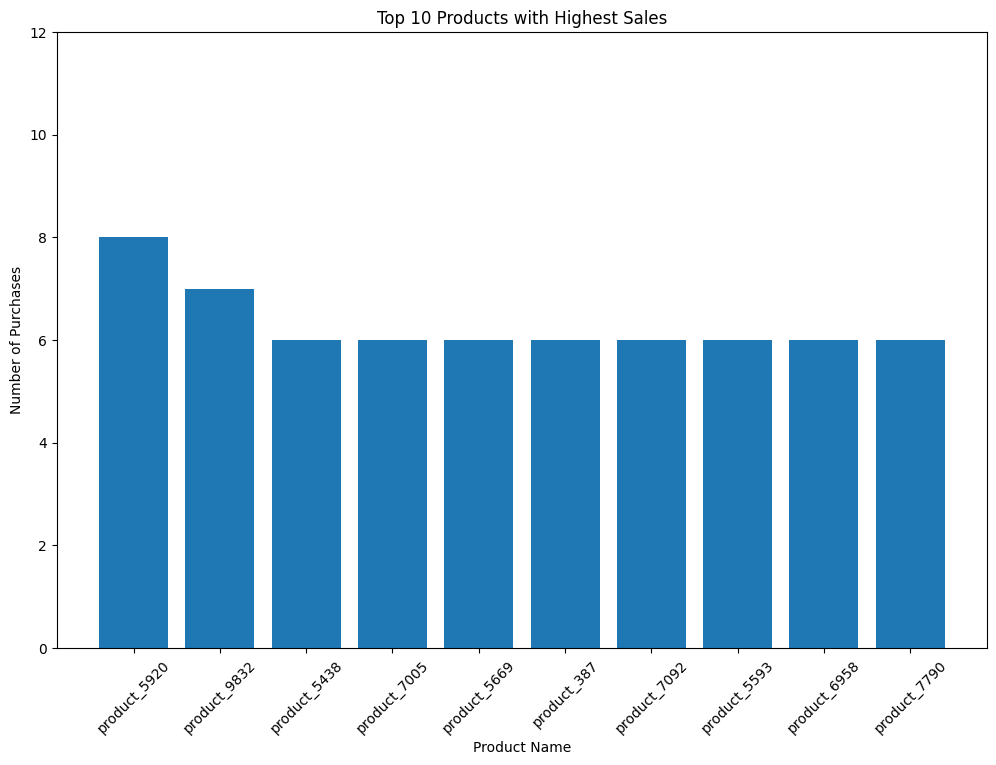

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Converting a Spark DataFrame into a Pandas DataFrame for detailed vizualization
top_products_pd = top_products_df.toPandas()

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_products_pd['product_name'].astype(str), top_products_pd['purchase_count'])
plt.xlabel('Product Name')
plt.ylabel('Number of Purchases')
plt.title('Top 10 Products with Highest Sales')
plt.xticks(rotation=45)
plt.ylim(top=12)
plt.show()




*   **Product_4677 is our bestseller with 8 purchases**
*   **Product_5920 is purchased for 7 times while the rest of the products were purchased for 6 times**



#### 2. Revenue Trend Line Chart - Showing monthly revenue over the past yea

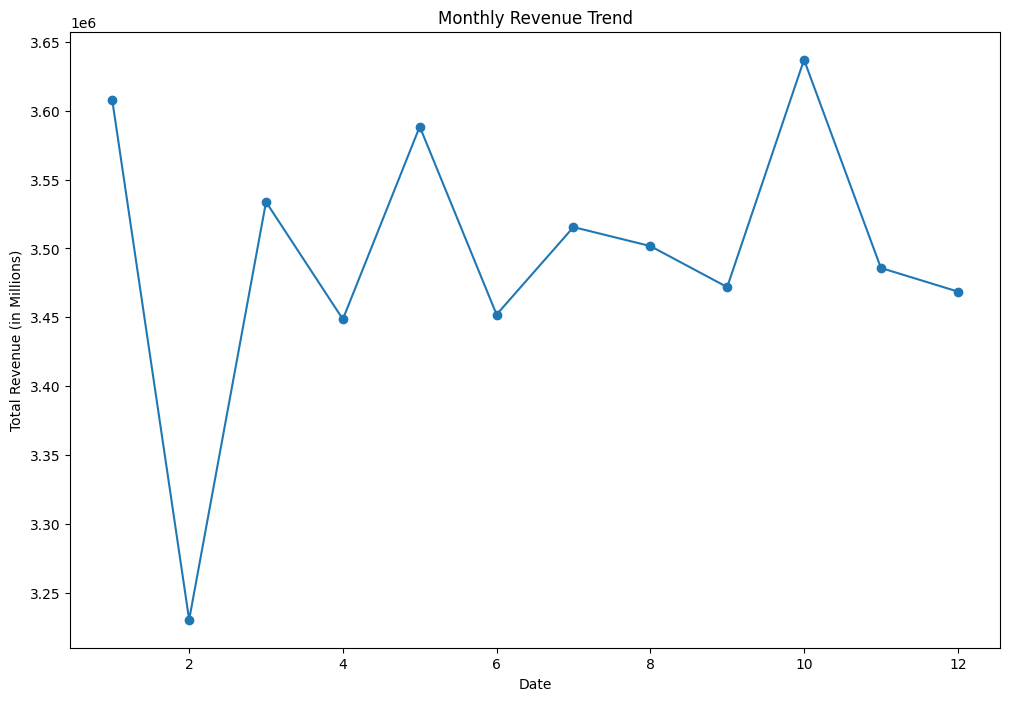

In [ ]:


monthly_revenue_pd = monthly_revenue_df.toPandas()


# Plotting the line chart
plt.figure(figsize=(12, 8))
plt.plot(monthly_revenue_pd['month'], monthly_revenue_pd['total_revenue'], marker='o')
plt.xlabel('Date')
plt.ylabel('Total Revenue (in Millions)')
plt.title('Monthly Revenue Trend')
plt.grid(False)
plt.xticks()
plt.show()




*   **The revenues were all around 3 Million**
*   **Febuary had the least revenue of the year with around 3.15 million**
*   **October had the heighest revenue of the year with around 3.6 million**
*   **In the middle of the year, we can see that the revenue is ranged around 3.4 and 3.5 million**



#### 3. Inventory Turnover Heatmap - Visualizing turnover rates across different product categories
Assuming you have a product_category column in the inventory data.

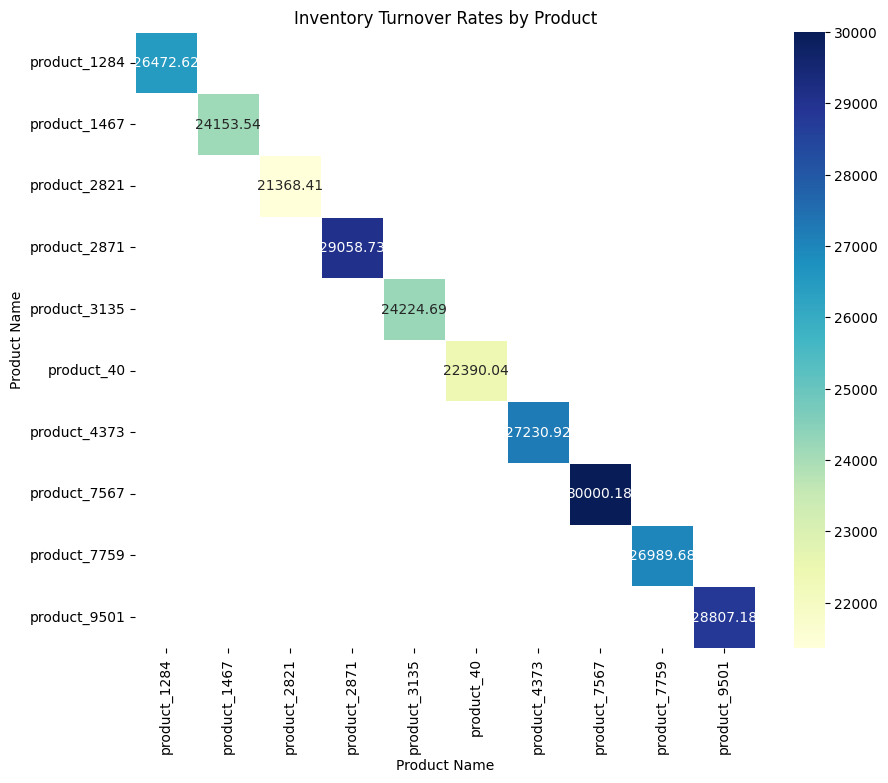

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas DataFrame
turnover_rate_pdf = turnover_rate_df.toPandas()

# Pivot the DataFrame to structure it for a heatmap
# Use pivot_table to create a pivot table suitable for a heatmap
turnover_rate_pivot = turnover_rate_pdf.pivot_table(index="product_name", columns="product_name", values="turnover_rate")

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create the heatmap using seaborn
heatmap = sns.heatmap(turnover_rate_pivot, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)

# Add labels and title
plt.title("Inventory Turnover Rates by Product")
plt.xlabel("Product Name")
plt.ylabel("Product Name")

# Show the plot
plt.show()



*   Product_7657 has the heigest trunover rate among all products
*   Product_2871 comes in second place while Product_9501




## Submission Guidelines
- Ensure that your code is well-documented and follows best practices.
- Include instructions on how to set up and run your ETL pipeline.
- Provide all necessary configurations and dependencies required for execution.
- If using external services (like Kafka or Redis), include setup instructions or mock implementations.


## Additional Resources
- [Apache Spark Documentation](https://spark.apache.org/documentation.html)
- [Spark Structured Streaming Guide](https://spark.apache.org/docs/latest/structured-streaming-programming-guide.html)
- [Optimizing Spark Performance](https://spark.apache.org/docs/latest/tuning.html)
- [Using Spark SQL](https://spark.apache.org/docs/latest/sql-programming-guide.html)
